<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/kep.png" height=75 width=75>
*This notebook uses routines from [PyKE](http://github.com/keplerGO/PyKE/) which is documented [here](http://pyke.keplerscience.org/). You can find these notebooks on [GitHub](https://github.com/christinahedges/k2torials)*

<!--NAVIGATION-->
< [Fitting a Basic Transit Model](01.05-Fitting-A-Basic-Transit-Model.ipynb) | [Contents](index.ipynb) |

# Which Flux to Use

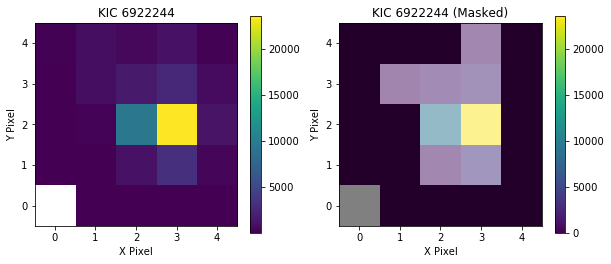

In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline


tpf = fits.open('data/kplr006922244-2010078095331_lpd-targ.fits.gz')

ap=tpf[2].data
ap[ap!=3]=0
ap=ap/3.

fig,ax=plt.subplots(1,2,figsize=(10,4))
s=ax[0].imshow(tpf[1].data['FLUX'][0],origin='bottom')
ax[0].set_xlabel('X Pixel')
ax[0].set_ylabel('Y Pixel')
fig.colorbar(s,ax=ax[0])
ax[0].set_title('KIC 6922244')


s=ax[1].imshow(ap*tpf[1].data['FLUX'][0],origin='bottom')
ax[1].set_xlabel('X Pixel')
ax[1].set_ylabel('Y Pixel')
fig.colorbar(s,ax=ax[1])
ax[1].set_title('KIC 6922244 (Masked)')
ax[1].imshow(ap,cmap=plt.get_cmap('Greys_r'),origin='bottom',alpha=0.5)

In [3]:
import numpy as np
ap=tpf[2].data
ap[ap!=3]=0
ap=ap/3.
masked=[ap*t for t in tpf[1].data['FLUX']]
SAP=np.nansum(np.nansum(masked,axis=1),axis=1)
NAP=np.nansum(np.nansum(tpf[1].data['FLUX'],axis=1),axis=1)
t=tpf[1].data['TIME']
ok=SAP!=0
t,SAP,NAP=t[ok],SAP[ok],NAP[ok]


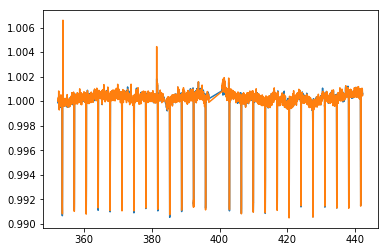

In [5]:
plt.plot(t,SAP/np.polyval(np.polyfit(t,SAP,2),t))
plt.plot(t,NAP/np.polyval(np.polyfit(t,NAP,2),t))

<!--NAVIGATION-->
< [Fitting a Basic Transit Model](01.05-Fitting-A-Basic-Transit-Model.ipynb) | [Contents](index.ipynb) |